## Part 1: Downloading and Importing Jeddah Weather Data

In [18]:
import tools
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

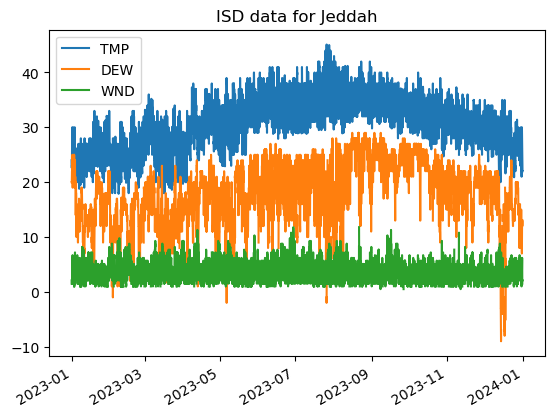

In [35]:
df_isd = tools.read_isd_csv('data/41024099999.csv')
plot = df_isd.plot(title="ISD data for Jeddah")
plt.show()

## Part 2: Heat Index (HI) Calculation

1. Calculate relative humidity with from dewpoint:

In [54]:
df_isd['RH'] = tools.dewpoint_to_rh(df_isd['DEW'].values, 
                                    df_isd['TMP'].values)

2. Calculate the HI from air temperature and relative humidity data using the gen_heat_index function from tools.py.

In [55]:
df_isd['HI'] = tools.gen_heat_index(df_isd['TMP'].values, df_isd['RH'].values)

3. What is the highest HI observed in 2023? Execute df isd.max() to obtain the maximum values for all columns, including the HI.

In [23]:
df_isd.max()

TMP     45.100000
DEW     29.000000
WND     11.800000
RH     100.000000
HI      55.259491
dtype: float64

The maximum heat index is 55.26.

4. What is the day and time when the highest HI was observed? Use the command df_isd.idxmax() to pinpoint the exact moment of the highest HI

In [24]:
df_isd.idxmax()

TMP   2023-07-26 09:00:00
DEW   2023-08-16 01:00:00
WND   2023-06-29 11:00:00
RH    2023-01-02 22:00:00
HI    2023-08-21 10:00:00
dtype: datetime64[ns]

The highes HI observed was in 2023-08-21 10:00:00

5. The ISD is a global dataset and time is expressed in Universal Coordinated Time (UTC). What is the local time of the highest HI?

As in Jeddah the local time corresponds to UTC+3 hours, the local time of the highest HI was 2023-08-21 13:00:00

6. What air temperature and relative humidity were observed at this moment? Use the command df_isd.loc[["yyyy-mm-dd HH:MM:SS"]]. Replace yyyy-mm-dd HH:MM:SS
with the highest HI date and time. The loc method is used to select specific rows or columns from a dataframe using the names of columns or indices

In [56]:
df_isd.loc[['2023-08-21 10:00:00']]

,TMP,DEW,WND,RH,HI
2023-08-21 10:00:00,38.0,29.0,5.7,60.427012,55.259491


7. Based on the National Weather Service’s HI categories, what physical effects on the body
might be expected at this HI level?

According to the US National Weather Service the Heat index 55 or 130 F corresponds to the lower limit of extreme danger conditions. This will produce heat cramps or heat exhaustion in the body, and heat stroke likely with prolonged exposure and/or physical activity.

8. Can this event of high temperature and humidity be called a heatwave?

A heat wave is a period of abnormally hot weather generally lasting more than two days. The heat index remains relatively high for more than two days, so we can call this event a heat wave.

9. Is it possible to calculate the HI using daily weather data instead of hourly data? The pandas dataframe method resample can be used for this purpose

In [39]:
df_isd.resample('24h').mean()

,TMP,DEW,WND
2023-01-01,25.682353,20.944118,3.780000
2023-01-02,25.721875,21.493750,2.290909
2023-01-03,26.228571,21.800000,3.142424
2023-01-04,23.933333,16.787879,3.951515
2023-01-05,22.806250,13.312500,3.821875
...,...,...,...
2023-12-27,27.718750,19.312500,2.396296
2023-12-28,26.828125,16.750000,3.255556
2023-12-29,26.115625,14.000000,4.037500
2023-12-30,25.971875,12.906250,4.309375


The above DataFrame shows daily measures by averaging the hourly data by days.

10. Produce a figure of the HI time series for 2023 as explained in the previous assignment using the plt.savefig function.

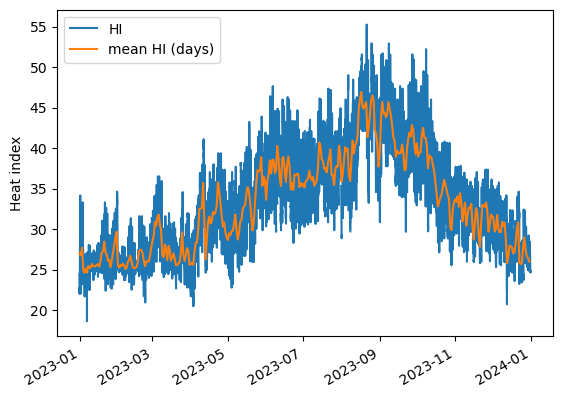

In [68]:
df_isd['HI'].plot()
df_isd.resample('24h').mean()['HI'].plot(label='mean HI (days)')
plt.ylabel('Heat index')
plt.legend()

## Part 3: Potential Impact of Climate Change

1. For Jeddah, based on CMIP6 models, the projected increase in air temperature from 1991–2010 to 2081–2100 under the ‘middle-of-the-road’ SSP2-4.5 scenario is approximately 3°C.
To assess the potential impact of climate change on hot spells in Jeddah, apply this pro-
jected warming to the air temperature data and recalculate the HI. What is the increase in
the highest HI value when this additional warming is considered?

In [72]:
df_isd['proj_TMP'] = df_isd['TMP'].values + 3 # summing 3 degrees

df_isd['proj_RH'] = tools.dewpoint_to_rh(df_isd['DEW'].values, 
                                    df_isd['proj_TMP'].values)

df_isd['proj_HI'] = tools.gen_heat_index(df_isd['proj_TMP'].values, 
                                         df_isd['proj_RH'].values)

TMP          45.100000
DEW          29.000000
WND          11.800000
RH          100.000000
HI           55.259491
proj_TMP     48.100000
proj_RH      83.796297
proj_HI      59.293985
dtype: float64

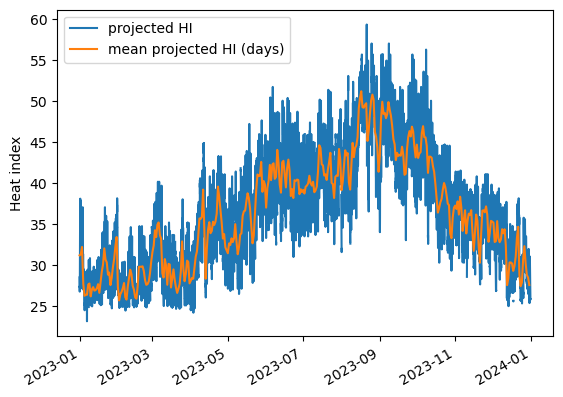

In [75]:
df_isd['proj_HI'].plot(label='projected HI')
df_isd.resample('24h').mean()['proj_HI'].plot(label='mean projected HI (days)')
plt.ylabel('Heat index')
plt.legend()
df_isd.max()

The maximum value of the Heat index in the projected scenario as shown by the table and the graph above, is 59.2, which means an increase of 4 index. This index value will be considered an Extreme Danger for living organisms.